# Lab 10  (included answers)
## Basic feed forward neural network 

In [58]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # for check the progress 
# A good progress bar is a useful progress bar. 
# To be useful, tqdm displays statistics and uses smart algorithms to predict and 
# automagically adapt to a variety of use cases with no or minimal configuration.
# conda install -c conda-forge tqdm or pip install tqdm
# https://github.com/tqdm/tqdm 
% matplotlib inline

# 1. MNIST dataset

####  https://ml-cheatsheet.readthedocs.io/en/latest/ (for All)
####  http://pythonkim.tistory.com/ (for Korean students )



## 1.1 Download MNIST dataset

In [59]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP117/", one_hot=True)

Extracting ITP117/train-images-idx3-ubyte.gz
Extracting ITP117/train-labels-idx1-ubyte.gz
Extracting ITP117/t10k-images-idx3-ubyte.gz
Extracting ITP117/t10k-labels-idx1-ubyte.gz


## 1.2 Understand structure of the MNIST dataset

<img src = https://d255esdrn735hr.cloudfront.net/graphics/9781788831109/graphics/B09698_03_03.jpg>

#### The MNIST dataset was constructed from two datasets of the US National Institute of Standards and Technology(NIST). The training set consists of handwritten digits from 250 different people, 50 percent high school students, and 50 percent employees from the Census Bureau. 

To train, and test, the implemented models, we will be using one of the most famous datasets called MNIST of handwritten digits. The MNIST dataset is a training set of 55,000 examples and a test set of 10,000 examples. An example of the data, as it is stored in the files of the examples, is shown in the preceding figure.

The source images were originally in black and white. Later, to normalize them to the size of 20×20 pixels, intermediate brightness levels were introduced, due to the effect of the anti-aliasing filter for resizing. Subsequently, the images were focused in the center of mass of the pixels, in an area of 28×28 pixels, in order to improve the learning process.


In [60]:
print(mnist)

# Split MNIST datset into 3 part: train, validation, test
train, validation, test = mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f709f8be6d8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f709faa0f28>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f709faa0a58>)


### Structure of the train set
#### train.labels: label vectors for each data
#### train.images: 1-d image vectors for each data

In [61]:
train.images.shape

(55000, 784)

In [62]:
train.labels.shape

(55000, 10)

## Exercise 1: Investigate structure of validation set and test set

In [63]:
print(validation.images.shape)
print(validation.labels.shape)


(5000, 784)
(5000, 10)


In [64]:
print(test.images.shape)
print(test.labels.shape)


(10000, 784)
(10000, 10)


## 1.3 Visualize images of the MNIST dataset

In [65]:
# Visualize a single digit  == > This is one-hot coding
image_0 =  mnist.train.images[1000]
image_0 = np.resize(image_0,(28,28))
label_0 =  mnist.train.labels[0]
print(label_0)
# The number 1 is the eighth position of the array. 
# This means that the figure for our image is the digit 7. 

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [66]:
# Function for visualize a MNIST image.
def visualize_MNIST_image(dataset, index):
    target_label = np.argmax(dataset.labels[index])
    target_image = dataset.images[index]
    
    # Reshape the array into 28 x 28 array (2-dimensional array)
    image_2d_array = target_image.reshape((28, 28))
    
    plt.title('Label: %d'%target_label)
    plt.imshow(image_2d_array, cmap='gray')
    plt.show()
    
    

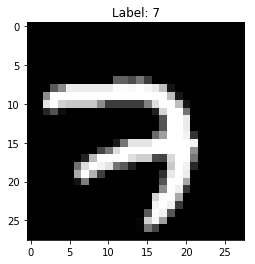

In [67]:
visualize_MNIST_image(train, 0)

# 2. Single layer neural network model

<img src="mnist_1layer.png">

## 2.1 Set the variables
### Set the hyper-parameters for neural network model

In [68]:
learning_rate = 0.05
num_of_epoch = 100  # training period

### Set placeholders
#### x  : Input image vectors with 784 dimension
#### y_: True label vectors with 10 dimenstion

In [69]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

### Set free parameters for neural network model
#### W : Weight matrix of neural network
#### b  : Bias of neural network

In [70]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

## 2.2 Define single layer neural network
#### Numerical expression for the neural network: y = softmax(x ⋅ W + b)

In [71]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

## 2.3 Define cross entropy loss function

In [72]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

## 2.4 Train the model's parameter W and b with gradient descent

In [73]:
# Define training step of the model
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [74]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in tqdm(range(num_of_epoch)):
    X = mnist.train.images
    Y = mnist.train.labels
    sess.run(train_step, feed_dict={x: X, y_: Y})


100%|██████████| 100/100 [00:09<00:00, 10.27it/s]


## 2.5 Evaluate the model's performance

In [75]:
# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [76]:
# Evaluate model performance
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.8509


## 2.6 Visualize trained weight matrix W

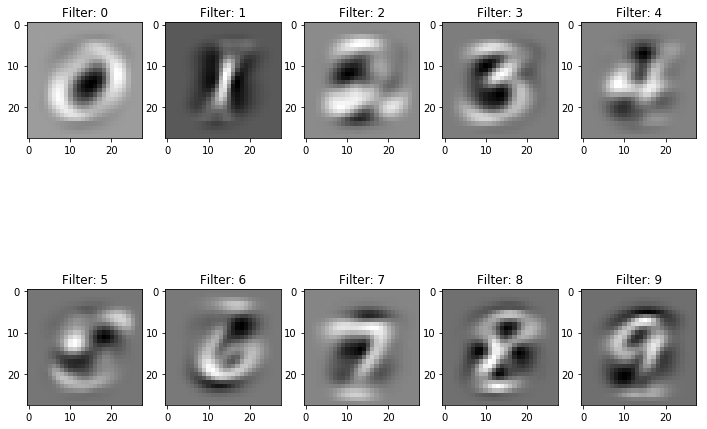

In [77]:
# Get value of the weight matrix W
W_ = sess.run(W)
plt.figure(figsize=(12, 9))
for i in range(10):
    W_i = W_[:,i].reshape((28,28))
    plt.subplot(2, 5, i+1)
    plt.title('Filter: %d'%i)
    plt.imshow(W_i, cmap='gray')

plt.show()
sess.close()

# Multi-layer neural network model
<img src="mnist_2layers.png">

In [78]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm

In [79]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP11703/", one_hot=True)

Extracting ITP11703/train-images-idx3-ubyte.gz
Extracting ITP11703/train-labels-idx1-ubyte.gz
Extracting ITP11703/t10k-images-idx3-ubyte.gz
Extracting ITP11703/t10k-labels-idx1-ubyte.gz


In [80]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

In [81]:
learning_rate = 0.4
num_of_epoch = 100

In [82]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [83]:
W1 = tf.Variable(weight_variable((784,10)))
b1 = tf.Variable(tf.zeros([10]))
h1 = tf.nn.relu(tf.matmul(x, W1)+b1)
W2 = tf.Variable(weight_variable((10,10)))
b2 = tf.Variable(tf.zeros([10]))  # for classfication, 

In [84]:
#h1 = y = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
y = tf.nn.softmax(tf.matmul(h1, W2))

In [85]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [86]:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [87]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in tqdm(range(num_of_epoch)):
    X = mnist.train.images
    Y = mnist.train.labels
    sess.run(train_step, feed_dict={x: X, y_: Y})

100%|██████████| 100/100 [00:10<00:00, 10.00it/s]


In [88]:
# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.8781


## Exercise 3: Visualize trained weight matrix of the W1

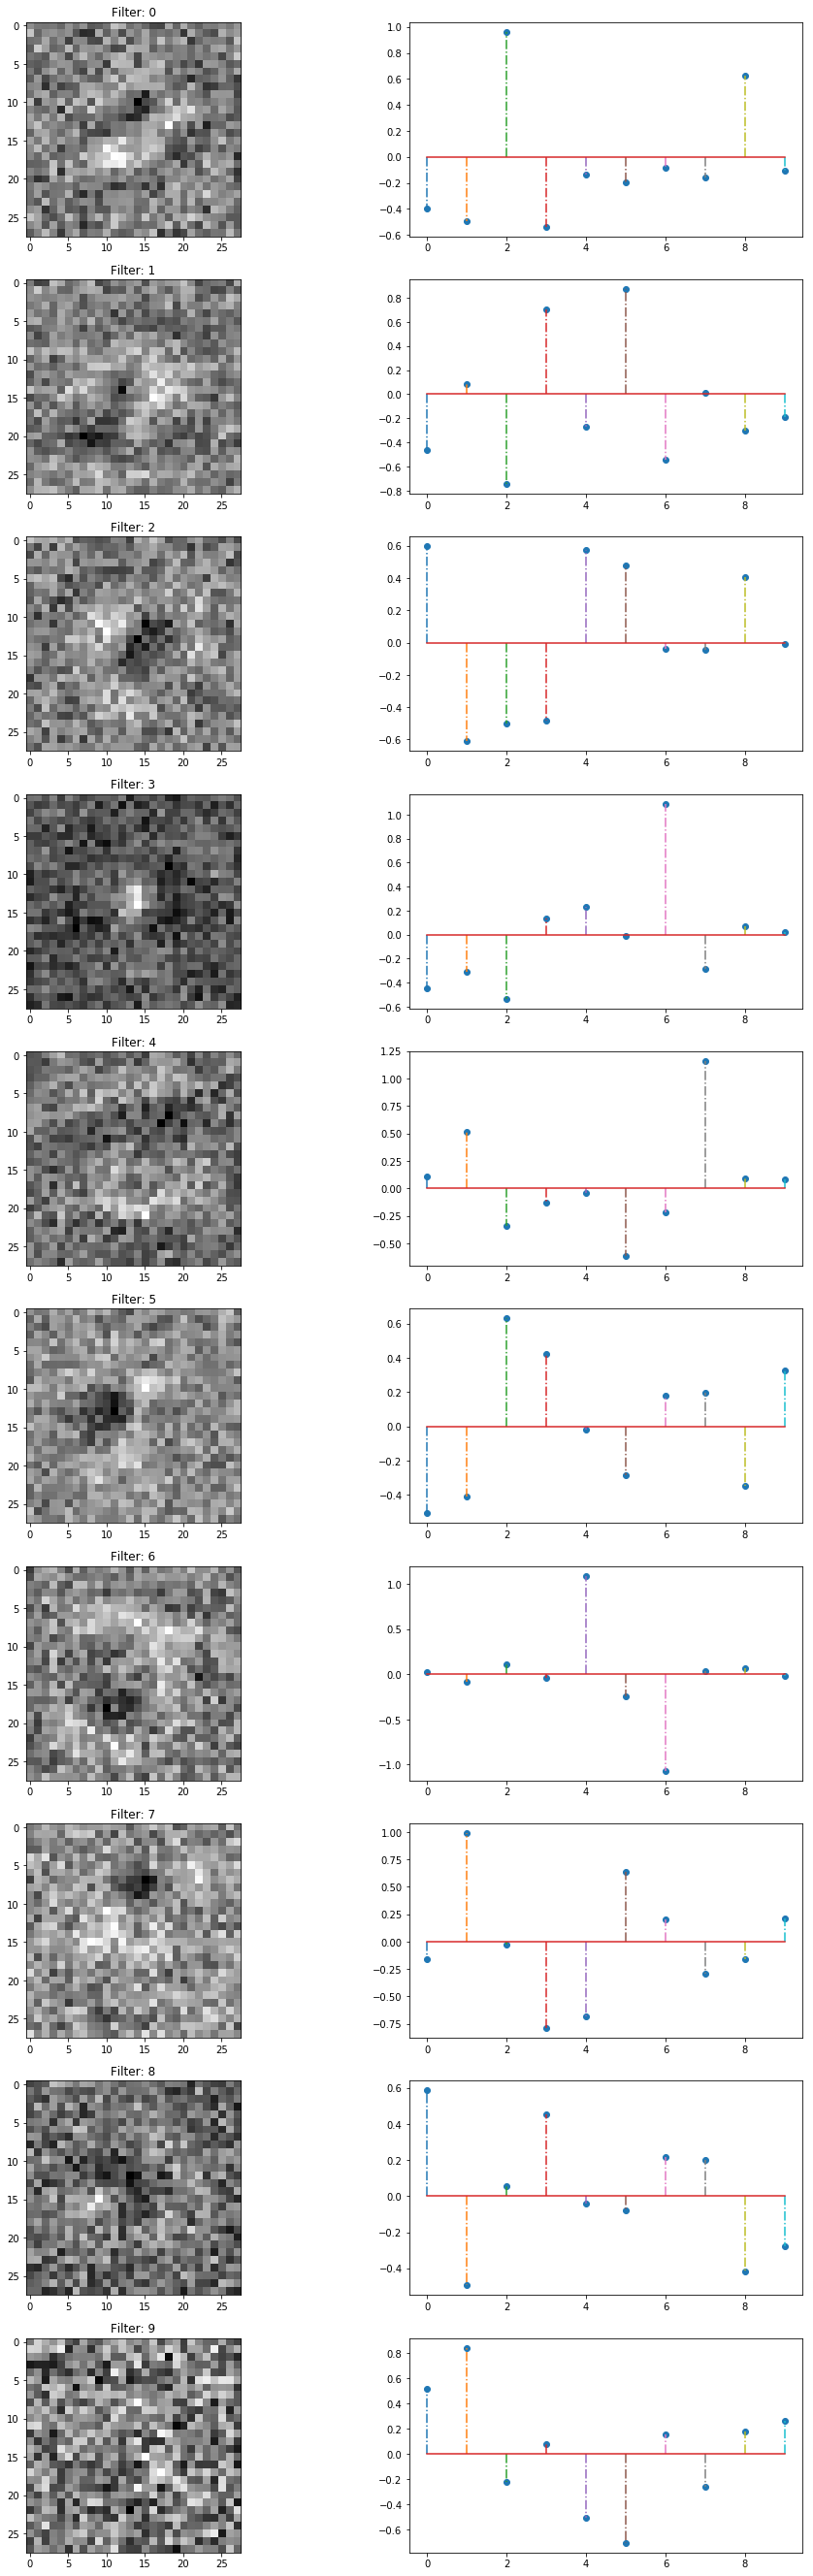

In [89]:
# Get value of the weight matrix W
W1_ = sess.run(W1)
W2_ = sess.run(W2)

# Plot filter in the first layer
plt.figure(figsize=(16, 48))
for i in range(10):
    W1_i = W1_[:,i].reshape((28,28))
    plt.subplot(10, 2, 2*i+1)
    plt.title('Filter: %d'%i)
    plt.imshow(W1_i, cmap='gray')  # gray    
    
    y = W2_[:,i]
    x = np.arange(len(y))
    plt.subplot(10, 2, 2*i+2)
    plt.stem(x, y, '-.')
    
plt.show()


## Assignment #1

### 1.1 Report the result of the test accuracy, when we set the dimension of hidden layer to (50, 100, 500, 1000).

In [99]:
### write your report  below
# shape 50 :: accuracy = 0.9641  
# shape 100 :: accuracy = 0.9741 
# shape 500 :: accuracy = 0.977
# shape 1000 :: accuracy = 0.9813

# Think about the result 

In [90]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP117/", one_hot=True)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

learning_rate = 0.001
num_of_epoch = 10
hidden_dim = 50
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(weight_variable((784,hidden_dim)))
#b1 = tf.Variable(tf.zeros([10]))
#h1 = tf.nn.relu(tf.matmul(x, W1)+b1)
h1 = tf.nn.relu(tf.matmul(x, W1))
h1 = tf.nn.dropout(h1, keep_prob)

W2 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
#b2 = tf.Variable(tf.zeros([10]))  # for classfy, 
#y = tf.nn.softmax(tf.matmul(h4, w5)+b5)
h2 = tf.nn.relu(tf.matmul(h1, W2))
h2 = tf.nn.dropout(h2, keep_prob)

W3 = tf.Variable(weight_variable((hidden_dim, 10)))
model = tf.matmul(h2, W3)

#cross_entropy  = cost 
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
# Change Optimizer function :: GradientDecentOptimizer -> AdamOptimizer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# insert batch size
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(num_of_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train_step, cross_entropy],feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization is finished')    

#for i in tqdm(range(num_of_epoch)):
#    X = mnist.train.images
#    Y = mnist.train.labels
#    sess.run(train_step, feed_dict={x: X, y_: Y})
    
# Define accuracy
correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1}))

sess.close()

Extracting ITP117/train-images-idx3-ubyte.gz
Extracting ITP117/train-labels-idx1-ubyte.gz
Extracting ITP117/t10k-images-idx3-ubyte.gz
Extracting ITP117/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.851
Epoch: 0002 Avg. cost = 0.414
Epoch: 0003 Avg. cost = 0.314
Epoch: 0004 Avg. cost = 0.258
Epoch: 0005 Avg. cost = 0.225
Epoch: 0006 Avg. cost = 0.202
Epoch: 0007 Avg. cost = 0.188
Epoch: 0008 Avg. cost = 0.173
Epoch: 0009 Avg. cost = 0.164
Epoch: 0010 Avg. cost = 0.160
Optimization is finished
0.9641


In [91]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP117/", one_hot=True)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

learning_rate = 0.001
num_of_epoch = 10
hidden_dim = 100
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(weight_variable((784,hidden_dim)))
#b1 = tf.Variable(tf.zeros([10]))
#h1 = tf.nn.relu(tf.matmul(x, W1)+b1)
h1 = tf.nn.relu(tf.matmul(x, W1))
h1 = tf.nn.dropout(h1, keep_prob)

W2 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
#b2 = tf.Variable(tf.zeros([10]))  # for classfy, 
#y = tf.nn.softmax(tf.matmul(h4, w5)+b5)
h2 = tf.nn.relu(tf.matmul(h1, W2))
h2 = tf.nn.dropout(h2, keep_prob)

W3 = tf.Variable(weight_variable((hidden_dim, 10)))
model = tf.matmul(h2, W3)

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
# Change Optimizer function :: GradientDecentOptimizer -> AdamOptimizer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# insert batch size
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(num_of_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train_step, cross_entropy],feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization is finished')    

#for i in tqdm(range(num_of_epoch)):
#    X = mnist.train.images
#    Y = mnist.train.labels
#    sess.run(train_step, feed_dict={x: X, y_: Y})
    
# Define accuracy
correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1}))

sess.close()

Extracting ITP117/train-images-idx3-ubyte.gz
Extracting ITP117/train-labels-idx1-ubyte.gz
Extracting ITP117/t10k-images-idx3-ubyte.gz
Extracting ITP117/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.626
Epoch: 0002 Avg. cost = 0.275
Epoch: 0003 Avg. cost = 0.199
Epoch: 0004 Avg. cost = 0.161
Epoch: 0005 Avg. cost = 0.139
Epoch: 0006 Avg. cost = 0.121
Epoch: 0007 Avg. cost = 0.110
Epoch: 0008 Avg. cost = 0.100
Epoch: 0009 Avg. cost = 0.092
Epoch: 0010 Avg. cost = 0.086
Optimization is finished
0.9741


In [92]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP117/", one_hot=True)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

learning_rate = 0.001
num_of_epoch = 10
hidden_dim = 500
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(weight_variable((784,hidden_dim)))
#b1 = tf.Variable(tf.zeros([10]))
#h1 = tf.nn.relu(tf.matmul(x, W1)+b1)
h1 = tf.nn.relu(tf.matmul(x, W1))
h1 = tf.nn.dropout(h1, keep_prob)

W2 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
#b2 = tf.Variable(tf.zeros([10]))  # for classfy, 
#y = tf.nn.softmax(tf.matmul(h4, w5)+b5)
h2 = tf.nn.relu(tf.matmul(h1, W2))
h2 = tf.nn.dropout(h2, keep_prob)

W3 = tf.Variable(weight_variable((hidden_dim, 10)))
model = tf.matmul(h2, W3)

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
# Change Optimizer function :: GradientDecentOptimizer -> AdamOptimizer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# insert batch size
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(num_of_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train_step, cross_entropy],feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization is finished')    

#for i in tqdm(range(num_of_epoch)):
#    X = mnist.train.images
#    Y = mnist.train.labels
#    sess.run(train_step, feed_dict={x: X, y_: Y})
    
# Define accuracy
correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1}))

sess.close()

Extracting ITP117/train-images-idx3-ubyte.gz
Extracting ITP117/train-labels-idx1-ubyte.gz
Extracting ITP117/t10k-images-idx3-ubyte.gz
Extracting ITP117/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.340
Epoch: 0002 Avg. cost = 0.127
Epoch: 0003 Avg. cost = 0.089
Epoch: 0004 Avg. cost = 0.068
Epoch: 0005 Avg. cost = 0.055
Epoch: 0006 Avg. cost = 0.047
Epoch: 0007 Avg. cost = 0.037
Epoch: 0008 Avg. cost = 0.033
Epoch: 0009 Avg. cost = 0.030
Epoch: 0010 Avg. cost = 0.029
Optimization is finished
0.977


In [93]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP117/", one_hot=True)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

learning_rate = 0.001
num_of_epoch = 10
hidden_dim = 1000
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(weight_variable((784,hidden_dim)))
#b1 = tf.Variable(tf.zeros([10]))
#h1 = tf.nn.relu(tf.matmul(x, W1)+b1)
h1 = tf.nn.relu(tf.matmul(x, W1))
h1 = tf.nn.dropout(h1, keep_prob)

W2 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
#b2 = tf.Variable(tf.zeros([10]))  # for classfy, 
#y = tf.nn.softmax(tf.matmul(h4, w5)+b5)
h2 = tf.nn.relu(tf.matmul(h1, W2))
h2 = tf.nn.dropout(h2, keep_prob)

W3 = tf.Variable(weight_variable((hidden_dim, 10)))
model = tf.matmul(h2, W3)

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
# Change Optimizer function :: GradientDecentOptimizer -> AdamOptimizer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# insert batch size
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(num_of_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train_step, cross_entropy],feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization is finished')    

#for i in tqdm(range(num_of_epoch)):
#    X = mnist.train.images
#    Y = mnist.train.labels
#    sess.run(train_step, feed_dict={x: X, y_: Y})
    
# Define accuracy
correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1}))

sess.close()

Extracting ITP117/train-images-idx3-ubyte.gz
Extracting ITP117/train-labels-idx1-ubyte.gz
Extracting ITP117/t10k-images-idx3-ubyte.gz
Extracting ITP117/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.276
Epoch: 0002 Avg. cost = 0.105
Epoch: 0003 Avg. cost = 0.074
Epoch: 0004 Avg. cost = 0.056
Epoch: 0005 Avg. cost = 0.049
Epoch: 0006 Avg. cost = 0.041
Epoch: 0007 Avg. cost = 0.035
Epoch: 0008 Avg. cost = 0.030
Epoch: 0009 Avg. cost = 0.033
Epoch: 0010 Avg. cost = 0.027
Optimization is finished
0.9813


### 1.2  Report the result when number of hidden layer is (2, 4, 8, 16).

In [103]:
# dimmension : 100 & hidden layer : 2  ==>  accuracy : 0.9755 
# dimmension : 100 & hidden layer : 4  ==>  accuracy : 0.9693 
# dimmension : 100 & hidden layer : 8  ==>  accuracy : 0.2126
# dimmension : 100 & hidden layer : 16  ==>  accuracy : 0.1051 (cost is not changed in the progress)
# Think about the above result

In [94]:
# Case of using Dropout() & dimension of hidden layer :: 100 / number of hidden layer : 2

import tensorflow as tf
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm # display the progress bar
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP117/", one_hot=True)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

learning_rate = 0.001
num_of_epoch = 10
hidden_dim = 100
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(weight_variable((784,hidden_dim)))
#b1 = tf.Variable(tf.zeros([10]))
#h1 = tf.nn.relu(tf.matmul(x, W1)+b1)
h1 = tf.nn.relu(tf.matmul(x, W1))
h1 = tf.nn.dropout(h1, keep_prob)

W2 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
#b2 = tf.Variable(tf.zeros([10]))  # for classfy, 
#y = tf.nn.softmax(tf.matmul(h4, w5)+b5)
h2 = tf.nn.relu(tf.matmul(h1, W2))
h2 = tf.nn.dropout(h2, keep_prob)

W3 = tf.Variable(weight_variable((hidden_dim, 10)))
model = tf.matmul(h2, W3)
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
# Change Optimizer function :: GradientDecentOptimizer -> AdamOptimizer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# insert batch size
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(num_of_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train_step, cross_entropy],feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization is finished')    

#for i in tqdm(range(num_of_epoch)):
#    X = mnist.train.images
#    Y = mnist.train.labels
#    sess.run(train_step, feed_dict={x: X, y_: Y})
    
# Define accuracy
correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1}))

sess.close()

Extracting ITP117/train-images-idx3-ubyte.gz
Extracting ITP117/train-labels-idx1-ubyte.gz
Extracting ITP117/t10k-images-idx3-ubyte.gz
Extracting ITP117/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.625
Epoch: 0002 Avg. cost = 0.273
Epoch: 0003 Avg. cost = 0.198
Epoch: 0004 Avg. cost = 0.161
Epoch: 0005 Avg. cost = 0.138
Epoch: 0006 Avg. cost = 0.121
Epoch: 0007 Avg. cost = 0.107
Epoch: 0008 Avg. cost = 0.098
Epoch: 0009 Avg. cost = 0.089
Epoch: 0010 Avg. cost = 0.083
Optimization is finished
0.9755


In [96]:
# Case of using Dropout() & dimension of hidden layer :: 100 / number of hidden layer : 4

import tensorflow as tf
import numpy as np
from tqdm import tqdm # display the progress bar
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP117/", one_hot=True)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

learning_rate = 0.001
num_of_epoch = 10
hidden_dim = 100
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(weight_variable((784,hidden_dim)))
#b1 = tf.Variable(tf.zeros([10]))
#h1 = tf.nn.relu(tf.matmul(x, W1)+b1)
h1 = tf.nn.relu(tf.matmul(x, W1))
h1 = tf.nn.dropout(h1, keep_prob)

W2 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h2 = tf.nn.relu(tf.matmul(h1, W2))
h2 = tf.nn.dropout(h2, keep_prob)

W3 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h3 = tf.nn.relu(tf.matmul(h2, W3))
h3 = tf.nn.dropout(h3, keep_prob)

W4 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h4 = tf.nn.relu(tf.matmul(h3, W4))
h4 = tf.nn.dropout(h4, keep_prob)

W5 = tf.Variable(weight_variable((hidden_dim, 10)))
model = tf.matmul(h4, W5)

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
# Change Optimizer function :: GradientDecentOptimizer -> AdamOptimizer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# insert batch size
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(num_of_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train_step, cross_entropy],feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization is finished')    

#for i in tqdm(range(num_of_epoch)):
#    X = mnist.train.images
#    Y = mnist.train.labels
#    sess.run(train_step, feed_dict={x: X, y_: Y})
    
# Define accuracy
correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1}))

sess.close()

Extracting ITP117/train-images-idx3-ubyte.gz
Extracting ITP117/train-labels-idx1-ubyte.gz
Extracting ITP117/t10k-images-idx3-ubyte.gz
Extracting ITP117/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.985
Epoch: 0002 Avg. cost = 0.371
Epoch: 0003 Avg. cost = 0.264
Epoch: 0004 Avg. cost = 0.206
Epoch: 0005 Avg. cost = 0.174
Epoch: 0006 Avg. cost = 0.152
Epoch: 0007 Avg. cost = 0.145
Epoch: 0008 Avg. cost = 0.129
Epoch: 0009 Avg. cost = 0.119
Epoch: 0010 Avg. cost = 0.111
Optimization is finished
0.9693


In [100]:
# Case of using Dropout() & dimension of hidden layer :: 100 / number of hidden layer : 8

import tensorflow as tf
import numpy as np
from tqdm import tqdm # display the progress bar
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP117/", one_hot=True)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

learning_rate = 0.001
num_of_epoch = 10
hidden_dim = 100
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(weight_variable((784,hidden_dim)))
#b1 = tf.Variable(tf.zeros([10]))
#h1 = tf.nn.relu(tf.matmul(x, W1)+b1)
h1 = tf.nn.relu(tf.matmul(x, W1))
h1 = tf.nn.dropout(h1, keep_prob)

W2 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h2 = tf.nn.relu(tf.matmul(h1, W2))
h2 = tf.nn.dropout(h2, keep_prob)

W3 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h3 = tf.nn.relu(tf.matmul(h2, W3))
h3 = tf.nn.dropout(h3, keep_prob)

W4 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h4 = tf.nn.relu(tf.matmul(h3, W4))
h4 = tf.nn.dropout(h4, keep_prob)

W5 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h5 = tf.nn.relu(tf.matmul(h4, W5))
h5 = tf.nn.dropout(h5, keep_prob)

W6 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h6 = tf.nn.relu(tf.matmul(h5, W6))
h6 = tf.nn.dropout(h6, keep_prob)

W7 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h7 = tf.nn.relu(tf.matmul(h6, W7))
h7 = tf.nn.dropout(h7, keep_prob)

W8 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h8 = tf.nn.relu(tf.matmul(h7, W8))
h8 = tf.nn.dropout(h8, keep_prob)

W9 = tf.Variable(weight_variable((hidden_dim, 10)))
model = tf.matmul(h8, W9)

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
# Change Optimizer function :: GradientDecentOptimizer -> AdamOptimizer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# insert batch size
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(num_of_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train_step, cross_entropy],feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization is finished')    

#for i in tqdm(range(num_of_epoch)):
#    X = mnist.train.images
#    Y = mnist.train.labels
#    sess.run(train_step, feed_dict={x: X, y_: Y})
    
# Define accuracy
correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1}))

sess.close()

Extracting ITP117/train-images-idx3-ubyte.gz
Extracting ITP117/train-labels-idx1-ubyte.gz
Extracting ITP117/t10k-images-idx3-ubyte.gz
Extracting ITP117/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 2.303
Epoch: 0002 Avg. cost = 2.303
Epoch: 0003 Avg. cost = 2.303
Epoch: 0004 Avg. cost = 2.303
Epoch: 0005 Avg. cost = 2.303
Epoch: 0006 Avg. cost = 2.247
Epoch: 0007 Avg. cost = 1.554
Epoch: 0008 Avg. cost = 1.468
Epoch: 0009 Avg. cost = 1.428
Epoch: 0010 Avg. cost = 1.414
Optimization is finished
0.2126


In [102]:
# Case of using Dropout() & dimension of hidden layer :: 100 / number of hidden layer : 16

import tensorflow as tf
import numpy as np
from tqdm import tqdm # display the progress bar
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("ITP117/", one_hot=True)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

learning_rate = 0.001
num_of_epoch = 10
hidden_dim = 100
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(weight_variable((784,hidden_dim)))
#b1 = tf.Variable(tf.zeros([10]))
#h1 = tf.nn.relu(tf.matmul(x, W1)+b1)
h1 = tf.nn.relu(tf.matmul(x, W1))
h1 = tf.nn.dropout(h1, keep_prob)

W2 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h2 = tf.nn.relu(tf.matmul(h1, W2))
h2 = tf.nn.dropout(h2, keep_prob)

W3 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h3 = tf.nn.relu(tf.matmul(h2, W3))
h3 = tf.nn.dropout(h3, keep_prob)

W4 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h4 = tf.nn.relu(tf.matmul(h3, W4))
h4 = tf.nn.dropout(h4, keep_prob)

W5 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h5 = tf.nn.relu(tf.matmul(h4, W5))
h5 = tf.nn.dropout(h5, keep_prob)

W6 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h6 = tf.nn.relu(tf.matmul(h5, W6))
h6 = tf.nn.dropout(h6, keep_prob)

W7 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h7 = tf.nn.relu(tf.matmul(h6, W7))
h7 = tf.nn.dropout(h7, keep_prob)

W8 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h8 = tf.nn.relu(tf.matmul(h7, W8))
h8 = tf.nn.dropout(h8, keep_prob)

W9 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h9 = tf.nn.relu(tf.matmul(h8, W9))
h9 = tf.nn.dropout(h9, keep_prob)

W10 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h10 = tf.nn.relu(tf.matmul(h9, W10))
h10 = tf.nn.dropout(h10, keep_prob)

W11 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h11 = tf.nn.relu(tf.matmul(h10, W11))
h11 = tf.nn.dropout(h11, keep_prob)

W12 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h12 = tf.nn.relu(tf.matmul(h11, W12))
h12 = tf.nn.dropout(h12, keep_prob)

W13 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h13 = tf.nn.relu(tf.matmul(h12, W13))
h13 = tf.nn.dropout(h13, keep_prob)

W14 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h14 = tf.nn.relu(tf.matmul(h13, W14))
h14 = tf.nn.dropout(h14, keep_prob)

W15 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h15 = tf.nn.relu(tf.matmul(h14, W15))
h15 = tf.nn.dropout(h15, keep_prob)

W16 = tf.Variable(weight_variable((hidden_dim,hidden_dim)))
h16 = tf.nn.relu(tf.matmul(h15, W16))
h16 = tf.nn.dropout(h16, keep_prob)

W17 = tf.Variable(weight_variable((hidden_dim, 10)))
model = tf.matmul(h16, W17)

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
# Change Optimizer function :: GradientDecentOptimizer -> AdamOptimizer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# insert batch size
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(num_of_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train_step, cross_entropy],feed_dict={x: batch_xs, y: batch_ys, keep_prob: 0.8})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    
print('Optimization is finished')    

#for i in tqdm(range(num_of_epoch)):
#    X = mnist.train.images
#    Y = mnist.train.labels
#    sess.run(train_step, feed_dict={x: X, y_: Y})
    
# Define accuracy
correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob:1}))

sess.close()

Extracting ITP117/train-images-idx3-ubyte.gz
Extracting ITP117/train-labels-idx1-ubyte.gz
Extracting ITP117/t10k-images-idx3-ubyte.gz
Extracting ITP117/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 2.303
Epoch: 0002 Avg. cost = 2.303
Epoch: 0003 Avg. cost = 2.303
Epoch: 0004 Avg. cost = 2.303
Epoch: 0005 Avg. cost = 2.303
Epoch: 0006 Avg. cost = 2.303
Epoch: 0007 Avg. cost = 2.303
Epoch: 0008 Avg. cost = 2.303
Epoch: 0009 Avg. cost = 2.303
Epoch: 0010 Avg. cost = 2.303
Optimization is finished
0.1041
